In [4]:
!wget https%3A%2F%2Fdownload.microsoft.com%2Fdownload%2F3%2FE%2F1%2F3E1C3F21-ECDB-4869-8368-6DEBA77B919F%2Fkagglecatsanddogs_5340.zip&v=ENXr1foShrA

--2024-04-03 15:46:34--  http://[https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip]/
Resolving https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip (https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip’


In [5]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zipa

--2024-04-03 15:46:35--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zipa
Resolving download.microsoft.com (download.microsoft.com)... 23.222.202.7, 2600:1408:ec00:889::317f, 2600:1408:ec00:887::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.222.202.7|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-04-03 15:46:37 ERROR 404: Not Found.



In [6]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-04-03 15:46:37--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.222.202.7, 2600:1408:ec00:889::317f, 2600:1408:ec00:887::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.222.202.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   129MB/s    in 8.5s    

2024-04-03 15:46:46 (92.1 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [7]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [9]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/9016.jpg 0


In [10]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Cat/7804.jpg,0
1,PetImages/Dog/11076.jpg,1
2,PetImages/Cat/8495.jpg,0
3,PetImages/Dog/8586.jpg,1
4,PetImages/Cat/1070.jpg,0


In [11]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [12]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [13]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

In [14]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [15]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

<Axes: ylabel='count'>

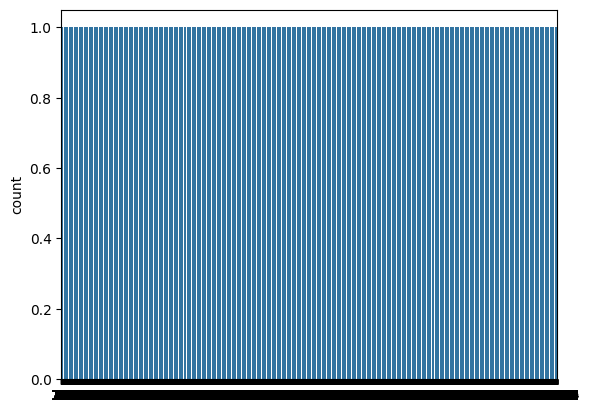

In [16]:
import seaborn as sns
sns.countplot(df['label'])

<Axes: ylabel='label'>

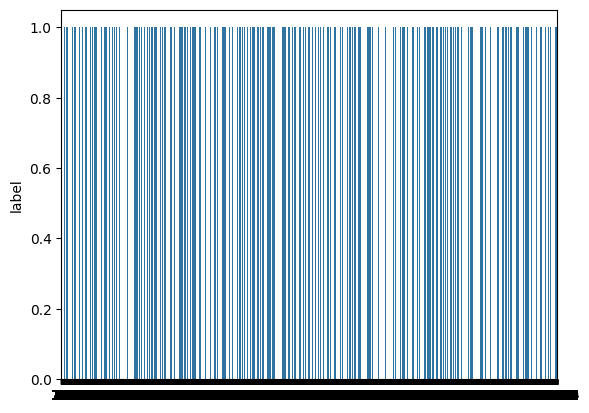

In [17]:
import seaborn as sns
sns.barplot(df['label'])

In [18]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages/Cat/7804.jpg,0
1,PetImages/Dog/11076.jpg,1
2,PetImages/Cat/8495.jpg,0
3,PetImages/Dog/8586.jpg,1
4,PetImages/Cat/1070.jpg,0


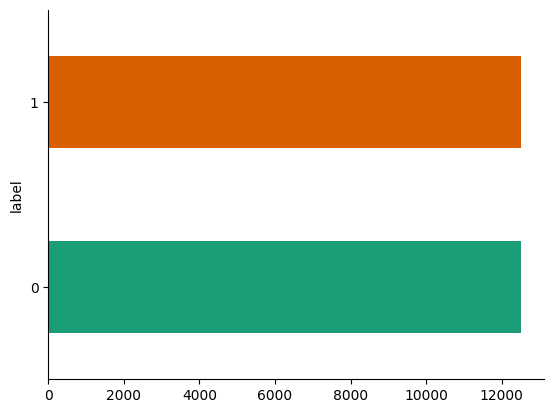

In [19]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)


Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [25]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [31]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 461s 11s/step - loss: 0.5513 - accuracy: 0.7141 - val_loss: 0.5245 - val_accuracy: 0.7332
Epoch 2/10
40/40 [==============================] - 472s 12s/step - loss: 0.5319 - accuracy: 0.7314 - val_loss: 0.5069 - val_accuracy: 0.7478
Epoch 3/10
40/40 [==============================] - 469s 12s/step - loss: 0.5062 - accuracy: 0.7489 - val_loss: 0.5049 - val_accuracy: 0.7514
Epoch 4/10
40/40 [==============================] - 475s 12s/step - loss: 0.5009 - accuracy: 0.7529 - val_loss: 0.4616 - val_accuracy: 0.7800
Epoch 5/10
40/40 [==============================] - 465s 12s/step - loss: 0.4685 - accuracy: 0.7741 - val_loss: 0.4469 - val_accuracy: 0.7874
Epoch 6/10
40/40 [==============================] - 457s 11s/step - loss: 0.4637 - accuracy: 0.7747 - val_loss: 0.4365 - val_accuracy: 0.7956
Epoch 7/10
40/40 [==============================] - 462s 11s/step - loss: 0.4427 - accuracy: 0.7910 - val_loss: 0.4199 - val_accuracy: 0.8062
Epoch 

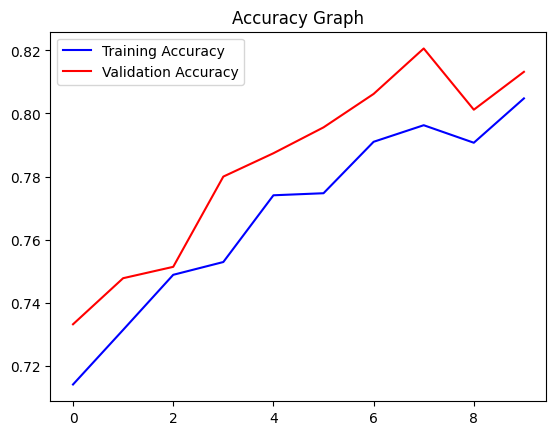

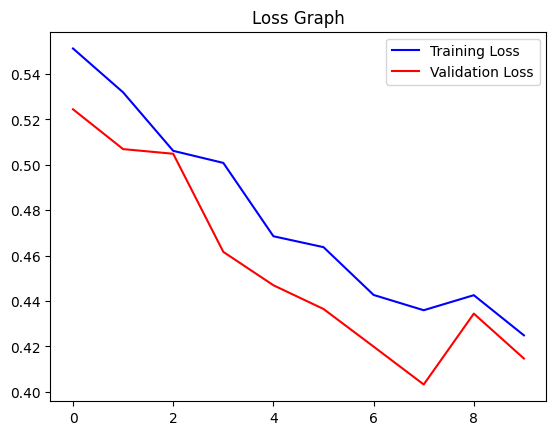

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [33]:
image_path = "/content/PetImages/Cat/10004.jpg" # path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 128, 128, 3) # reshape for prediction
pred = model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)


1/1 [==============================] - 0s 57ms/step
Cat
